In [1]:
# Importing the required libraries
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import os
import seaborn as sns

In [2]:
# Training Data Creation

train_images = []
train_labels = [] 
Categories = ['normal',"anomaly"]
Datadir = "/content/drive/MyDrive/image_dataset_anomaly_detection/train"


#Can ve varied but with 128 x 128 pixels the image was clearly visible. 
Image_size = 128

def training_data_creation():

  for category in Categories:
    #Getting to the specific directory where the Normal and Anomaly images are stored
    current_path = os.path.join(Datadir, category) 

    # Storing the Classification of each Image by storing its index as either 0 or 1 [0-> Normal , 1-> Anomaly ] 
    class_num = Categories.index(category)

    for current_image in os.listdir(current_path):
      img = cv2.imread(os.path.join(current_path,current_image), cv2.IMREAD_COLOR) 

      img = cv2.resize(img, (Image_size, Image_size))
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

      train_images.append(img)
      train_labels.append(class_num)

training_data_creation()

In [3]:
#Converting into numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [4]:
#Testing Data augmentation and creation

test_images = []
test_labels = [] 

Categories = ['normal',"anomaly"]
Datadir = "/content/drive/MyDrive/image_dataset_anomaly_detection/test"


#Can ve varied but with 128 x 128 pixels the image was clearly visible. 
Image_size = 128

def testing_data_creation():

  for category in Categories:
    #Getting to the specific directory where the Normal and Anomaly images are stored
    current_path = os.path.join(Datadir, category) 

    # Storing the Classification of each Image by storing its index as either 0 or 1 [0-> Normal , 1-> Anomaly ] 
    class_num = Categories.index(category)

    for current_image in os.listdir(current_path):
      img = cv2.imread(os.path.join(current_path,current_image), cv2.IMREAD_COLOR) 

      img = cv2.resize(img, (Image_size, Image_size))
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

      test_images.append(img)
      test_labels.append(class_num)

testing_data_creation()

In [5]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
# Pushing the values to default variable names to make it more intuitive
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

In [7]:
#  Normalize pixel 0 to 1
x_train, x_test = np.divide(x_train,255), np.divide(x_test,255)

#One hot encode all the y values for 
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
# Creating a simple sequential model 
activation = 'sigmoid'

model_extract = Sequential()

#Adding 3 conv2d layers
model_extract.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (Image_size, Image_size, 3)))
model_extract.add(BatchNormalization())

model_extract.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model_extract.add(BatchNormalization())
model_extract.add(MaxPooling2D())

model_extract.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model_extract.add(BatchNormalization())

model_extract.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model_extract.add(BatchNormalization())
model_extract.add(MaxPooling2D())

#Flatten to make it 1D
model_extract.add(Flatten())

In [9]:
#Add layers for deep learning prediction
x = model_extract.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(2, activation = 'sigmoid')(x)

In [10]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=model_extract.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'binary_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

In [ ]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=10, validation_data = (x_test, y_test_one_hot))

Epoch 1/10
208/208 [==============================] - 698s 3s/step - loss: 0.6237 - accuracy: 0.7520 - val_loss: 1.3669 - val_accuracy: 0.6336
Epoch 2/10
208/208 [==============================] - 693s 3s/step - loss: 0.3188 - accuracy: 0.8741 - val_loss: 1.7540 - val_accuracy: 0.6336
Epoch 3/10
208/208 [==============================] - 697s 3s/step - loss: 0.2456 - accuracy: 0.9058 - val_loss: 0.8917 - val_accuracy: 0.5175
Epoch 4/10
208/208 [==============================] - 698s 3s/step - loss: 0.1891 - accuracy: 0.9349 - val_loss: 1.0747 - val_accuracy: 0.5860
Epoch 5/10
208/208 [==============================] - 693s 3s/step - loss: 0.1750 - accuracy: 0.9371 - val_loss: 2.6967 - val_accuracy: 0.6336
Epoch 6/10
208/208 [==============================] - 691s 3s/step - loss: 0.1530 - accuracy: 0.9483 - val_loss: 1.9215 - val_accuracy: 0.6336
Epoch 7/10
208/208 [==============================] - 689s 3s/step - loss: 0.1363 - accuracy: 0.9537 - val_loss: 1.3506 - val_accuracy: 0.6727

In [ ]:
cnn_model.save('Model-4-RF.model')

INFO:tensorflow:Assets written to: Model-4-RF.model/assets


In [ ]:
!zip -r /content/Model-RF-model.zip /content/Model-4-RF.model

  adding: content/Model-4-RF.model/ (stored 0%)
  adding: content/Model-4-RF.model/keras_metadata.pb (deflated 93%)
  adding: content/Model-4-RF.model/assets/ (stored 0%)
  adding: content/Model-4-RF.model/saved_model.pb (deflated 90%)
  adding: content/Model-4-RF.model/variables/ (stored 0%)
  adding: content/Model-4-RF.model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/Model-4-RF.model/variables/variables.index (deflated 72%)


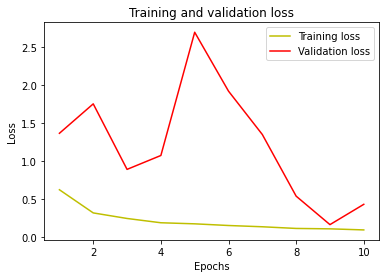

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

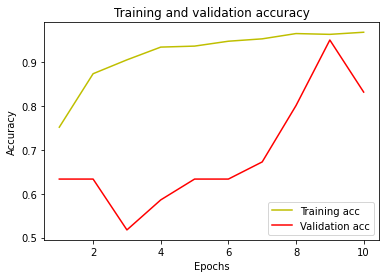

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)

[[160 102]
 [ 18 435]]


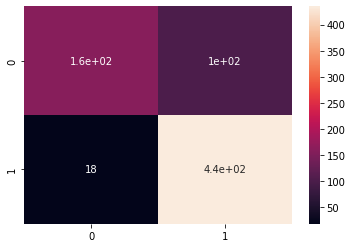

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)


The prediction for this image is:  1
The actual label for this image is:  0


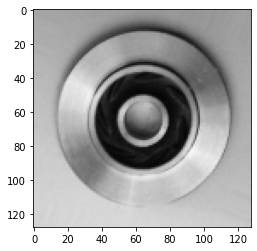

In [ ]:
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [11]:
#Now, let us use features from convolutional network for RF
X_for_RF = model_extract.predict(x_train) 
#This is out X input to Random forest model

In [12]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [13]:
#Send test data through same feature extractor process
X_test_feature = model_extract.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)

In [14]:
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("Precision score of the model %.3f" % (precision_score(test_labels, prediction_RF)))
print("Recall score of the model %.3f" % (recall_score(test_labels, prediction_RF)))
print("F1 score of the model %.3f" % (f1_score(test_labels, prediction_RF)))

print("\nAccuracy score of the model %.3f" % (accuracy_score(test_labels, prediction_RF)))

print("\nConfusion Matrix \n ")
print((confusion_matrix(test_labels, prediction_RF)))


Precision score of the model 0.991
Recall score of the model 0.978
F1 score of the model 0.984

Accuracy score of the model 0.980

Confusion Matrix 
 
[[258   4]
 [ 10 443]]


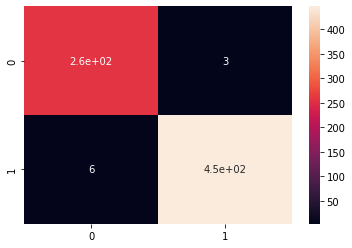

In [ ]:
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  0
The actual label for this image is:  0


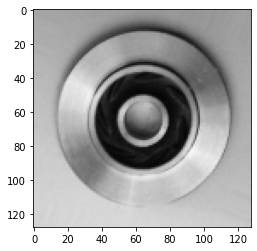

In [ ]:
n=9 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_features=model_extract.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
import pickle

pickle.dump(cnn_model, open("Model-CNN-RF.model", 'wb'))

INFO:tensorflow:Assets written to: ram://42f6e20e-cc1c-4687-9a08-a9744e46616e/assets
